In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LinReg
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split as tts

In [2]:
traineo = pd.read_csv('./data/salaries_data.csv')
traineo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


In [3]:
traineos = traineo.copy()

In [4]:
y = traineo.salary_in_usd

In [5]:
traineos.drop(columns = 'salary_in_usd', inplace = True)

In [6]:
traineos.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,RO,0,US,L


In [7]:
testeo = pd.read_csv('./data/testeo.csv')
testeo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,87000,USD,US,100,US,L
2,2020,MI,FT,Data Analyst,85000,USD,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,299000,CNY,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,450000,INR,IN,100,IN,L


In [8]:
total = pd.concat([traineos, testeo], axis = 0)
total.shape

(607, 10)

In [9]:
total.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [10]:
experience_level_ = {'MI':0, 'SE':1, 'EN':2, 'EX':3}
total['experience_level'] = total['experience_level'].map(experience_level_)

In [11]:
total.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [12]:
employment_type_ = {'FT':0, 'PT':1, 'CT':2, 'FL':4}
total['employment_type'] = total['employment_type'].map(employment_type_)

In [13]:
total.company_size.value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [14]:
company_size_ = {'M':0, 'L':1, 'S':2}
total['company_size'] = total['company_size'].map(company_size_)
total.shape

(607, 10)

In [15]:
total.drop(columns = ['salary','salary_currency','employee_residence'], inplace = True)

In [16]:
total.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2022,1,0,Data Engineer,100,US,0
1,2022,1,0,Data Engineer,100,US,0
2,2021,0,0,BI Data Analyst,100,US,0
3,2021,0,2,ML Engineer,100,US,1
4,2021,0,0,Data Engineer,0,US,1


In [17]:
total.reset_index(drop = True, inplace = True)

In [18]:
total.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2022,1,0,Data Engineer,100,US,0
1,2022,1,0,Data Engineer,100,US,0
2,2021,0,0,BI Data Analyst,100,US,0
3,2021,0,2,ML Engineer,100,US,1
4,2021,0,0,Data Engineer,0,US,1


In [19]:
total.tail()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
602,2022,1,0,Data Analyst,100,US,0
603,2022,1,0,Data Architect,100,US,0
604,2022,1,0,Data Scientist,100,US,0
605,2022,2,0,Data Analyst,0,CA,0
606,2022,1,0,Data Analyst,0,US,0


In [20]:
total.shape

(607, 7)

In [21]:
total=pd.get_dummies(total, columns=['job_title', 'company_location'], drop_first = True)
total.shape

(607, 103)

In [22]:
testeo_m=total[500:]
testeo_m

,work_year,experience_level,employment_type,remote_ratio,company_size,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,job_title_BI Data Analyst,...,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
500,2020,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,2020,0,0,100,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
502,2020,0,0,100,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
503,2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
504,2020,0,0,100,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,1,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
603,2022,1,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
604,2022,1,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
605,2022,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
salaries_m=total[0:500]
salaries_m

,work_year,experience_level,employment_type,remote_ratio,company_size,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,job_title_BI Data Analyst,...,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,2022,1,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2022,1,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2021,0,0,100,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2021,0,2,100,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2021,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2022,1,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
496,2021,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,2022,1,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,2021,0,0,100,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X = salaries_m  

In [25]:
X_train, X_test, y_train, y_test = tts(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 103), (100, 103), (400,), (100,))

In [27]:
linreg=LinReg()

In [28]:
salaries_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 103 entries, work_year to company_location_VN
dtypes: int64(5), uint8(98)
memory usage: 67.5 KB


In [29]:
X

,work_year,experience_level,employment_type,remote_ratio,company_size,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,job_title_BI Data Analyst,...,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,2022,1,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2022,1,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2021,0,0,100,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2021,0,2,100,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2021,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2022,1,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
496,2021,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,2022,1,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,2021,0,0,100,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X.employment_type.info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: employment_type
Non-Null Count  Dtype
--------------  -----
500 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


In [31]:
pd.set_option('display.max_rows', None)

X_test.dropna().shape

(100, 103)

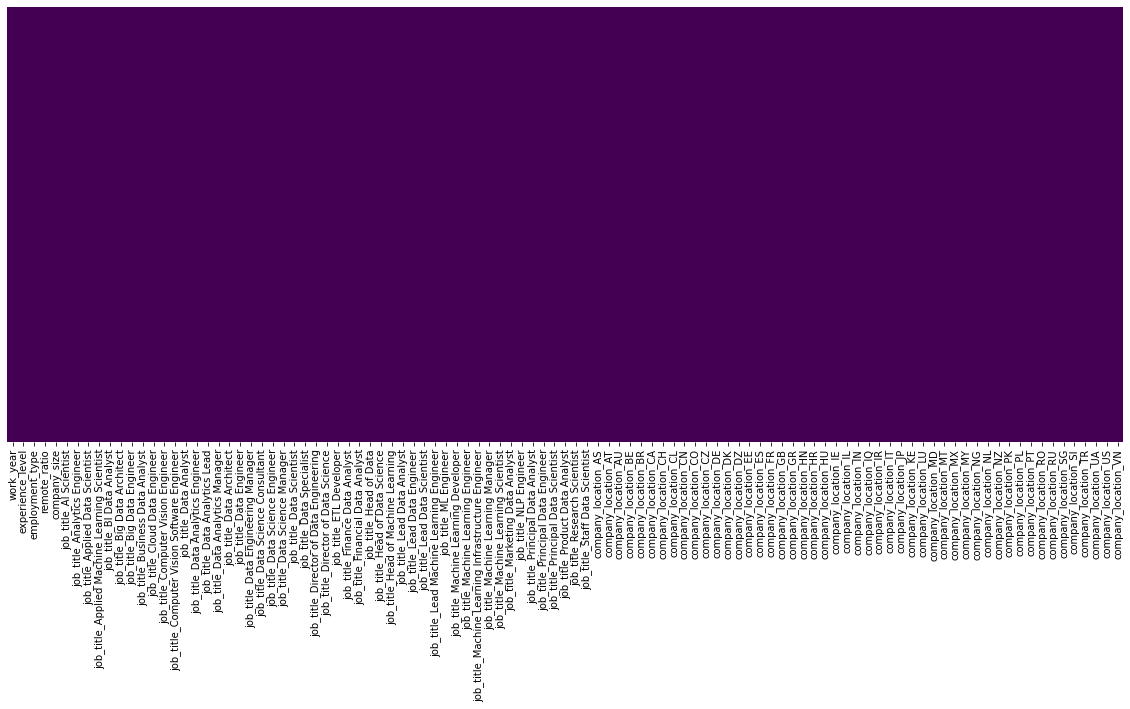

In [32]:
plt.figure(figsize=(20, 8))  

sns.heatmap(X.isna(), 
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [33]:
linreg.fit(X_test, y_test)

LinearRegression()

In [34]:
linreg.predict(X_test)[:10]

array([ 77396.11455505, 104879.6654283 , 125795.54726557, 129528.03656463,
       129528.03656463,  45244.88219042,  61896.        , 136526.0950205 ,
        92029.84652363,  80268.14147811])

In [35]:
y_pred = linreg.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error as mse 

In [37]:
mse(y_test, y_pred, squared=False)

39403.430605396235

In [38]:
y_pred1=linreg.predict(testeo_m)

In [39]:
y_pred1

array([ 29882.54477288, 170647.44315469, 146729.67616973, 189972.06661822,
        42117.83622408,  83300.80916125, 180621.4587352 ,  46453.82344855,
       148896.80464265, 154388.15331726,  64310.64301002, 166588.58620292,
       176554.28060983, 109076.25101047, 168926.29369765,  48620.95192148,
        86809.24227361, 146184.29630586,  -3004.32817365, 119238.9056133 ,
        59021.73677515,  68329.42839234,  93944.8280376 , 177908.9503984 ,
        36789.01171708,  98688.35148209, 105926.43952923, 122897.81464128,
       162248.23078006, 176967.20202504, 204321.19338536, 134704.26986841,
         5689.87262014,  51194.19329078, 189100.31910165, 129918.24366859,
       177908.9503984 ,  47767.99255729, 141022.21006832, 150963.55970584,
       -26034.60883424,  27213.21617521, 122266.5293209 , 156158.31188637,
       133992.18459379, 160522.0865058 , 124025.38869645,  83462.47059647,
       134704.26986841, 101164.30121547, 146904.70275407, 152596.40160912,
       125795.54726557, 1

In [40]:
prueba=pd.DataFrame(y_pred1,columns=['salary_in_usd'])
prueba.to_csv('./data/prueba.csv',index_label='id')

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso=Lasso()

In [43]:
lasso.fit(X_test, y_test)

Lasso()

In [44]:
y_pred2 = lasso.predict(X_test)

mse(y_test, y_pred2, squared=False) 

39403.80645398692

In [46]:
y_pred3 = lasso.predict(testeo_m)

In [47]:
y_pred3

array([ 34819.8999031 , 175288.47681917, 146459.70423578, 187707.32815408,
        46942.44899806,  81008.62168809, 180330.24491762,  46449.88973457,
       148878.874347  , 154086.34427918,  81733.19854247, 166244.54735824,
       176071.70701549, 106817.35057518, 167174.99388307,  48869.0598458 ,
        91820.62407633, 151097.02887633,  -2353.19534615, 124378.66222287,
        59295.98819409,  68296.77742121,  94122.25196905, 182548.39944694,
        37558.48285516, 101571.01167891, 105982.03911971, 127658.63767473,
       159936.19889218, 174465.26617606, 201732.0938063 , 134627.90025349,
         6096.52983464,  52040.98622156, 187067.58560491, 129935.22988234,
       182548.39944694,  78328.07046652, 141246.13770665, 155830.03279348,
       -38556.37884151,  32217.00888953, 122268.25629293, 156138.79697477,
       134153.43423846, 165296.04062779, 123708.8639539 ,  83251.16063042,
       134627.90025349, 101895.10195912, 146786.10333255, 150883.21111715,
       125761.31664947, 1

In [48]:
prueba1=pd.DataFrame(y_pred3, columns=['salary_in_usd'])
prueba1.to_csv('./data/prueba1.csv',index_label='id')

In [49]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [50]:
rfr=RFR()

In [51]:
rfr.fit(X_test, y_test)

RandomForestRegressor()

In [54]:
y_pred4 = rfr.predict(X_test)

mse(y_test, y_pred4, squared=False) 

25642.3934696752

In [55]:
y_pred5 = rfr.predict(testeo_m)

In [56]:
y_pred5

array([ 72294.66333333, 135120.        , 134380.        ,  80531.00466667,
        52076.55333333,  81665.52      , 322521.38095238,  64676.93      ,
       162275.92      , 192208.83404401,  61073.84      , 299394.        ,
       138660.95561855,  69205.37      , 100338.39      ,  88991.83      ,
        84868.46      , 127373.95      ,  61884.38      ,  49273.82      ,
       106591.5       ,  70987.45      ,  81075.22333333, 142621.99103968,
        45527.57      ,  58923.87      , 125107.35666667, 137080.87333333,
        78580.62      ,  81595.05      ,  83223.73      , 139201.95565115,
        81040.29      ,  80849.68333333,  69193.43      ,  76251.926     ,
       142621.99103968,  72834.49      ,  70201.25      , 160532.16401587,
        40632.3       ,  34460.21      , 121643.95      , 188135.08730159,
       148344.68396825, 155454.67      ,  91285.6       ,  59657.26      ,
       139201.95565115,  74455.84      , 148911.53968254,  81418.32333333,
        93729.93333333, 1

In [57]:
prueba2=pd.DataFrame(y_pred5, columns=['salary_in_usd'])
prueba2.to_csv('./data/prueba2.csv',index_label='id')